# Init

In [2]:
%load_ext autoreload
%autoreload 2

In [65]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat
from scipy.special import jv
import cv2

# Plotting phase masks

## MPI Minerva

In [90]:
file_loc = 'D:\Polarization Holography\Alex Minerva\pol_mask.mat'
phase_mask = loadmat(file_loc)['mask']

# Modulating between 0 and 0.5pi
phase_mask = (phase_mask/255) * 0.5 * np.pi

# Scaling phase_mask
phase_mask = cv2.resize(phase_mask, (1000,1000))

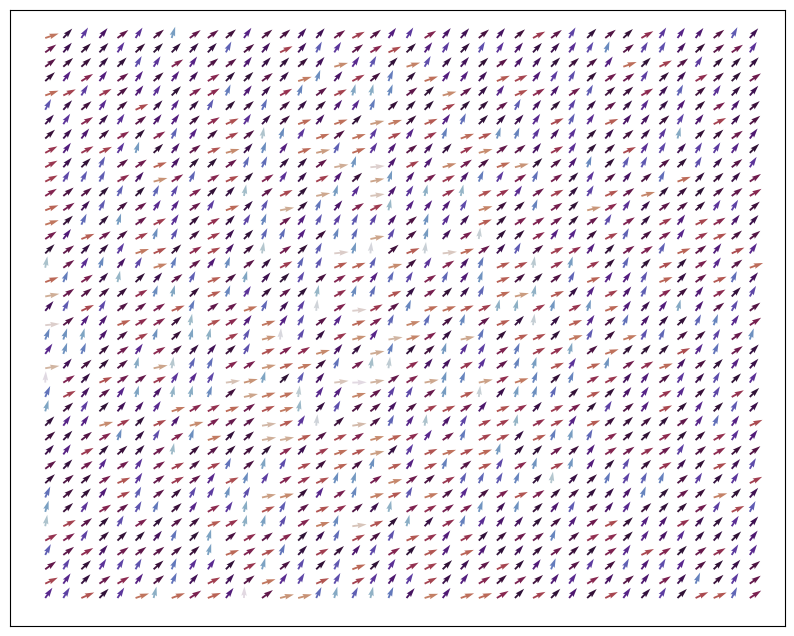

In [110]:
# Create a meshgrid for the arrow plot with reduced density
x, y = np.meshgrid(np.arange(phase_mask.shape[1])[::25], np.arange(phase_mask.shape[0])[::25])

# Create the arrow plot
plt.figure(figsize=(10, 8))
plt.quiver(x, y, np.cos(phase_mask[::25, ::25]), np.sin(phase_mask[::25, ::25]), phase_mask[::25, ::25], cmap='twilight_r', scale = 0.05, scale_units = 'xy')

# Remove x and y ticks
plt.xticks([])
plt.yticks([])

# Change colorbar tick size
# cbar = plt.colorbar()
# cbar.set_label('Polarization Rotation (rad)', fontsize=20, labelpad = 20)
# cbar.ax.tick_params(labelsize=16)

plt.savefig('Plots/Polarization Masks/Minerva Pol Mask bare.png', dpi = 800, transparent = True)
plt.savefig('Plots/Polarization Masks/Minerva Pol Mask bare.svg')

plt.show()


## Generating Gaussian Source Beam

In [105]:
# Define the size of the matrix
size = (1000, 1000)

# Create a meshgrid
x, y = np.meshgrid(np.arange(size[1]), np.arange(size[0]))

# Define the center of the Gaussian pattern
center_x = size[1] // 2
center_y = size[0] // 2

# Define the standard deviation of the Gaussian pattern
sigma = 300

# Calculate the Gaussian values
gaussian = np.exp(-((x - center_x)**2 + (y - center_y)**2) / (2 * sigma**2))

# Normalize the Gaussian values to the range [0, 1]
gaussian = (gaussian - np.min(gaussian)) / (np.max(gaussian) - np.min(gaussian))

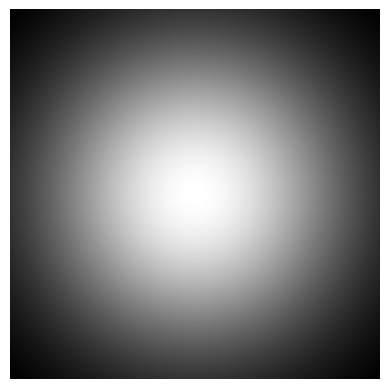

In [108]:
# Display the pattern
plt.imshow(gaussian, cmap='gray')
plt.axis('off')
plt.savefig('Plots/Amplitude/Gaussian.png', dpi = 800, transparent = True)
plt.show()


# Create the patterns for circuit plot

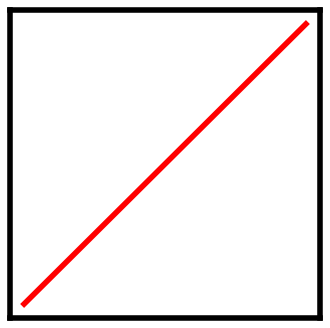

In [121]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(4, 4))

# Plot the line y=x
x = [0, 1]
y = [0, 1]
ax.plot(x, y, color = 'red', linewidth=4)

# Remove ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Set thick lines and borders
ax.spines['top'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)

# Saving the plot
plt.savefig('Plots/Schematic/y=x.png', dpi = 800, transparent = True)

# Show the plot
plt.show()


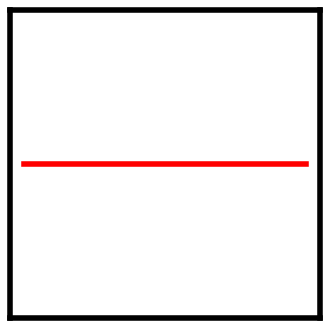

In [119]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(4, 4))

# Plot the line y=x
x = [0, 1]
y = [1, 1]
ax.plot(x, y, color = 'red', linewidth=4)

# Remove ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Set thick lines and borders
ax.spines['top'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)

# Saving the plot
plt.savefig('Plots/Schematic/y=const.png', dpi = 800, transparent = True)

# Show the plot
plt.show()


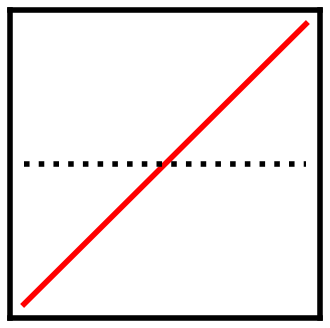

In [136]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(4, 4))

# Plot the line y=x as a dotted line
x = [-1, 1]
y = [-1, 1]

x0 = np.linspace(-1, 1, 100)
y0 = np.zeros(100)
ax.plot(x, y,  color='red', linewidth=4)
ax.plot(x0, y0, linestyle='dotted', color='black', linewidth=4)

# Remove ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Set thick lines and borders
ax.spines['top'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)

# Saving the plot
plt.savefig('Plots/Schematic/negative.png', dpi=800, transparent=True)

# Show the plot
plt.show()

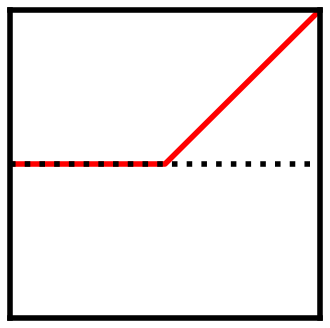

In [139]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(4, 4))

# Plot the line y=x as a dotted line
x = [-1, 0, 1]
y = [0, 0, 1]

x0 = np.linspace(-1, 1, 100)
y0 = np.zeros(100)
ax.plot(x, y,  color='red', linewidth=4)
ax.plot(x0, y0, linestyle='dotted', color='black', linewidth=4)

# Set x-axis and y-axis limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

# Remove ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Set thick lines and borders
ax.spines['top'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)

# Saving the plot
plt.savefig('Plots/Schematic/relu.png', dpi=800, transparent=True)

# Show the plot
plt.show()

# Polarization Nonlinearity

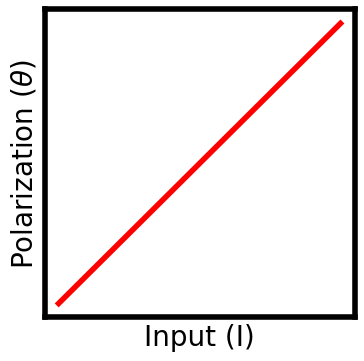

In [145]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(4, 4))

# Plot the line y=x
x = [0, 1]
y = [0, 1]

x0 = np.linspace(-1, 1, 100)
y0 = np.zeros(100)
ax.plot(x, y,  color='red', linewidth=4)

# Set labels
ax.set_xlabel('Input (I)', fontsize=20)
ax.set_ylabel(r'Polarization ($\theta$)', fontsize=20)

# Remove ticks and labels
ax.set_xticks([])
ax.set_yticks([])

# Set thick lines and borders
ax.spines['top'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)

# Saving the plot
plt.savefig('Plots/Schematic/pol_nl_1.png', dpi=800, transparent=True)

# Show the plot
plt.show()

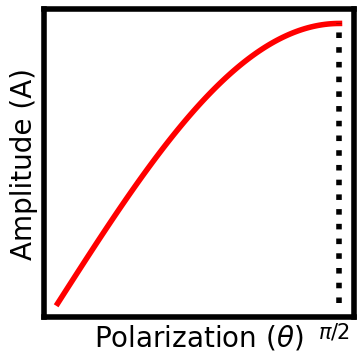

In [168]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(4, 4))

# Plot the line y=x
x = np.linspace(0, np.pi/2, 100)
y = np.sin(x)

x_dot = [np.pi/2, np.pi/2]
y_dot = [0, 1]

ax.plot(x, y,  color='red', linewidth=4)
ax.plot(x_dot, y_dot, linestyle='dotted', color='black', linewidth=4)

# Set labels
ax.set_xlabel(r'Polarization ($\theta$)', fontsize=20)
ax.set_ylabel(r'Amplitude (A)', fontsize=20)

# Remove ticks and labels
ax.set_xticks([])
ax.set_yticks([])

# Set thick lines and borders
ax.spines['top'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)

# Add text "π/2" at the origin of x_dot, y_dot line
ax.text(np.pi/2, -0.1, r'$\pi/2$', fontsize=15, position=(1.45, -0.125))

# Saving the plot
plt.savefig('Plots/Schematic/pol_nl_2.png', dpi=800, transparent=True)

# Show the plot
plt.show()

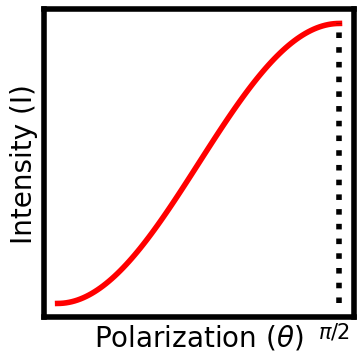

In [171]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(4, 4))

# Plot the line y=x
x = np.linspace(0, np.pi/2, 100)
y = np.square(np.sin(x))

x_dot = [np.pi/2, np.pi/2]
y_dot = [0, 1]

ax.plot(x, y,  color='red', linewidth=4)
ax.plot(x_dot, y_dot, linestyle='dotted', color='black', linewidth=4)

# Set labels
ax.set_xlabel(r'Polarization ($\theta$)', fontsize=20)
ax.set_ylabel(r'Intensity (I)', fontsize=20)

# Remove ticks and labels
ax.set_xticks([])
ax.set_yticks([])

# Set thick lines and borders
ax.spines['top'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)

# Add text "π/2" at the origin of x_dot, y_dot line
ax.text(np.pi/2, -0.1, r'$\pi/2$', fontsize=15, position=(1.45, -0.125))

# Saving the plot
plt.savefig('Plots/Schematic/pol_nl_3.png', dpi=800, transparent=True)

# Show the plot
plt.show()

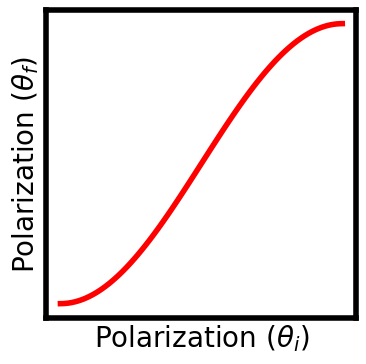

In [177]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(4, 4))

# Plot the line y=x
x = np.linspace(0, np.pi/2, 100)
y = (np.pi/2) * np.square(np.sin(x))

x_dot = [np.pi/2, np.pi/2]
y_dot = [0, np.pi/2]

ax.plot(x, y,  color='red', linewidth=4)
# ax.plot(x_dot, y_dot, linestyle='dotted', color='black', linewidth=4)

# Set labels
ax.set_xlabel(r'Polarization ($\theta_i$)', fontsize=20)
ax.set_ylabel(r'Polarization ($\theta_f$)', fontsize=20)

# Remove ticks and labels
ax.set_xticks([])
ax.set_yticks([])

# Set thick lines and borders
ax.spines['top'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)

# Add text "π/2" at the origin of x_dot, y_dot line
# ax.text(np.pi/2, -0.1, r'$\pi/2$', fontsize=15, position=(1.45, -0.2))

# Saving the plot
plt.savefig('Plots/Schematic/pol_nl_4.png', dpi=800, transparent=True)

# Show the plot
plt.show()